In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, desc

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///./resources/hawaii.sqlite")


In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
inspector = inspect(engine)

columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])
   
max_date = session.query(func.max(Measurement.date))

for row in max_date:
    print(row[0])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
2017-08-23


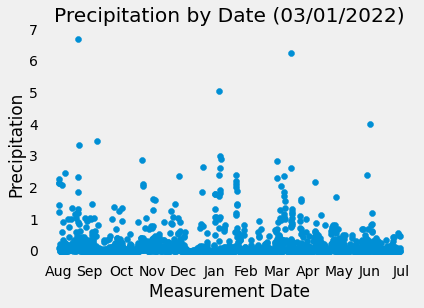

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.

query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores


year_of_data = session.query(Measurement.id,Measurement.station, Measurement.date, Measurement.prcp,Measurement.tobs).\
        order_by(Measurement.date.desc()).filter(Measurement.date > query_date)

# Save the query results as a Pandas DataFrame and set the index to the date column

precip_data = pd.DataFrame(year_of_data, columns=['id','station','date','prcp','tobs'])
precip_data.set_index('date', inplace = True,)


# Sort the dataframe by date

precip_data = precip_data.sort_values(by="date")

# Use Pandas Plotting with Matplotlib to plot the data

x_values = precip_data.reset_index()['date']
y_values = precip_data['prcp']

months = ['Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb','Mar','Apr','May','Jun','Jul']
plt.xticks(np.linspace(0,365,12), months)

plt.scatter(x_values,y_values)

plt.xlabel('Measurement Date')
plt.ylabel('Precipitation')
plt.title('Precipitation by Date (03/01/2022)')
plt.grid()
plt.show()
# plt.savefig("../output_data/nhtemplat.png")


In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

drug_group = dfmouse.groupby('Drug Regimen')

tumor_data = drug_group.agg({"Tumor Volume (mm3)": ["mean","median","var","std","sem"]}) 

tumor_data.columns = ["Mean","Median","Variance","Standard Deviation","SEM"]

print(tumor_data)

# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()